<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Convolution-Neural-Networks/blob/main/Case_Studies_of_Effective_Convolution_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Case Studies of effective Convolution Neural Networks

Classic networks:
* LeNet-5
* AlexNet
* VGG
<br>
<br>
* ResNet
* Inception

### LeNet-5

* goal of it was to recognize handwritten digits
* trained on gray-scale images, hence the input dimension was (32* 32* 1)
* Conv2D(filters = 6, kernel_size = (5), stride = 1) -> avg pooling -> Conv2D(filters = 16, kernel_size = (5), stride = 1) -> avg pooling -> dense(120) -> dense(84) -> dense(10)
* 60k parameters

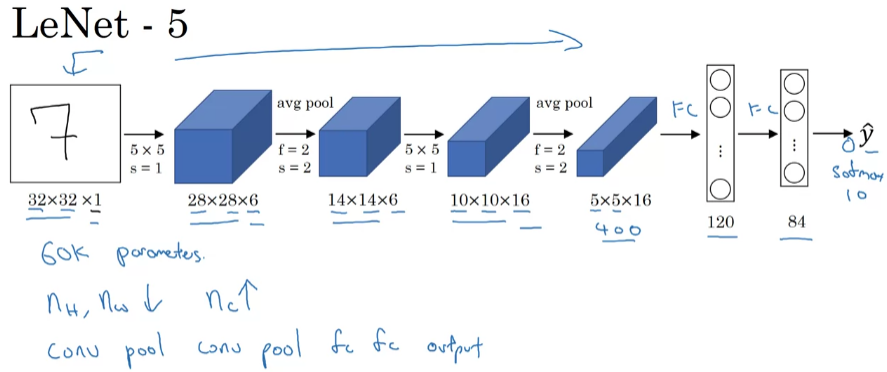

### [AlexNet](https://www.mygreatlearning.com/blog/alexnet-the-first-cnn-to-win-image-net/#:~:text=AlexNet%20was%20the%20first%20convolutional,layers%2C%20and%201%20softmax%20layer.)

* inputs starts with 227 * 227 * 3
* AlexNet architecture consists of 5 convolutional layers, 3 max-pooling layers, 2 normalization layers, 2 fully connected layers, and 1 softmax layer.

* Conv2D(filters = 96, kernel_size = 11, stride = 4) -> MaxPooling(pool_size = 3, stride = 2) -> Conv2D(filters = 256, kernel_size = 5, padding = 'same') -> MaxPooling(pool_size = 3, stride = 2) -> Conv2D(filters = 384, kernel_size = 3, padding = 'same') -> conv -> conv -> maxpool
* 9216 -> Dense(4096) -> Dense(4096) -> Dense(1, activation = 'softmax')

* 60M parameters

The model which won the competition was tuned with specific details-

1. ReLU is an activation function 

2. Used Normalization layers which are not common anymore 

3. Batch size of 128 

4. SGD Momentum as learning algorithm 

5. Heavy Data Augmentation with things like flipping, jittering, cropping, color normalization, etc. 

6. Ensembling of models to get the best results. 

### [VGG 16](https://www.mygreatlearning.com/blog/introduction-to-vgg16/)

* First and foremost, compared to the large receptive fields in the first convolutional layer, this model proposed the use of a very small 3 x 3 receptive field (filters) throughout the entire network with the stride of 1 pixel. Please note that the receptive field in the first layer in AlexNet was 11 x 11 with stride 4, and the same was 7 x 7 in ZFNet with stride 2. 

* All the max pooling layers were of pool_size = 2 and stride of 2
* padding used was always "same"

* conv(filters = 64)x2 -> pool -> conv(filters = 128)x2 -> pool -> conv(filters = 256)x3 -> pool -> conv(filters = 512)x3 -> pool -> conv(filters = 512) x 3 -> pool -> FC(4096)x2 -> softmax

* 16 in vgg 16 means it has 16 layers that have weights
* 138M parameters
* vgg-19 is a bigger version of this network (they perform the same, hence less talked about)

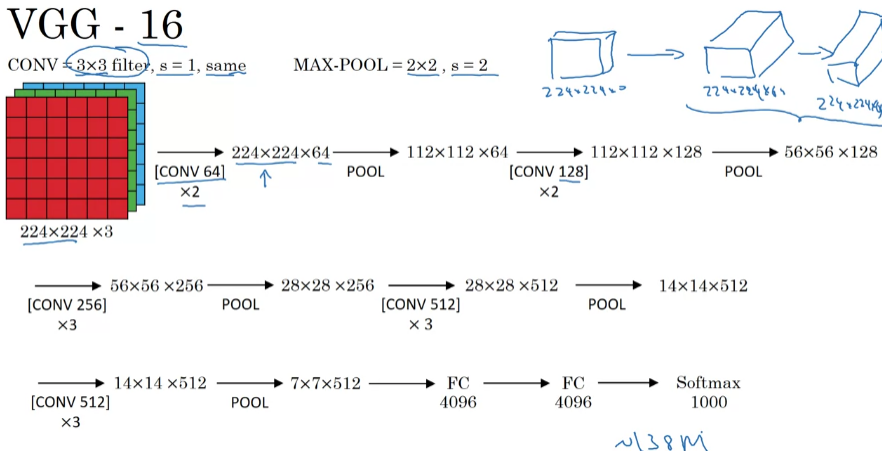

```
Vanishing Gradient: 
The vanishing gradients problem is one example of unstable behaviour that you may encounter when training a deep neural network.

It describes the situation where a deep multilayer feed-forward network or a recurrent neural network is unable to propagate useful gradient information from the output end of the model back to the layers near the input end of the model.

sigmoid function, squishes a large input space into a small input space between 0 and 1. 
Therefore, a large change in the input of the sigmoid function will cause a small change in the output. Hence, the derivative becomes small.

Gradients of neural networks are found using backpropagation. Simply put, backpropagation finds the derivatives of the network by moving layer by layer from the final layer to the initial one. 
By the chain rule, the derivatives of each layer are multiplied down the network (from the final layer to the initial) to compute the derivatives of the initial layers.

However, when n hidden layers use an activation like the sigmoid function, n small derivatives are multiplied together. Thus, the gradient decreases exponentially as we propagate down to the initial layers.

A small gradient means that the weights and biases of the initial layers will not be updated effectively with each training session. Since these initial layers are often crucial to recognizing the core elements of the input data, it can lead to overall inaccuracy of the whole network.

The result is the general inability of models with many layers to learn on a given dataset, or for models with many layers to prematurely converge to a poor solution.
```

[medium](https://medium.com/towards-data-science/the-vanishing-gradient-problem-69bf08b15484)
[mygreatlearning](https://www.mygreatlearning.com/blog/the-vanishing-gradient-problem/)



```
In a network of n hidden layers, n derivatives will be multiplied together.
If the derivatives are large then the gradient will increase exponentially as we propagate down the model until they eventually explode, and this is what we call the problem of exploding gradient. 
Alternatively, if the derivatives are small then the gradient will decrease exponentially as we propagate through the model until it eventually vanishes, and this is the vanishing gradient problem.
```



### ResNets

Very deep neural networks are hard to train because of vanishing and exploding gradients

Skip connections allows us to take the activation from one layer and suddenly feed it to another layer even much deeper in neural network

Using that we are going to build resnets which enables us to train very very deep networks.

They are built out of something called residual block.


Residual Block:

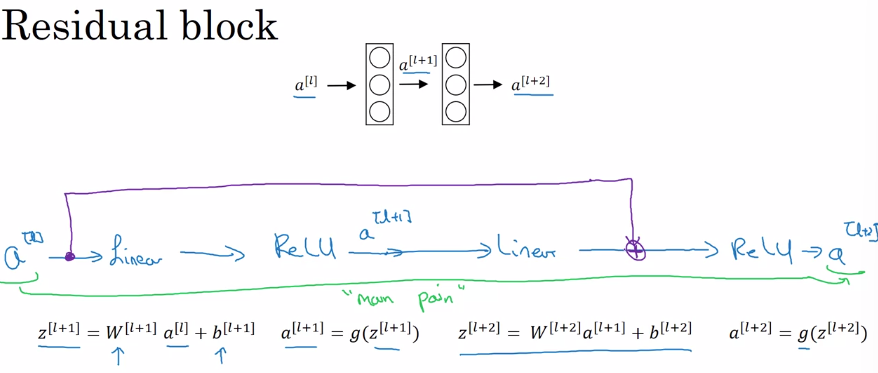

In order for information from a[l] to flow to a[l+2], it needs to go through all of these steps which can be "main path".

If we make a shortcut where info from a[l] can now follow a shortcut to go much deeper into the neural network.

So, the last equation becomes

```
a[l+2] = g(z[l+2] + a[l])
```

So, the addition of a[l] makes this a residual block

Also, this short-cut is also referred to as skip-connection

The way resnets are build are by taking many of these residual blocks and stacking them together

 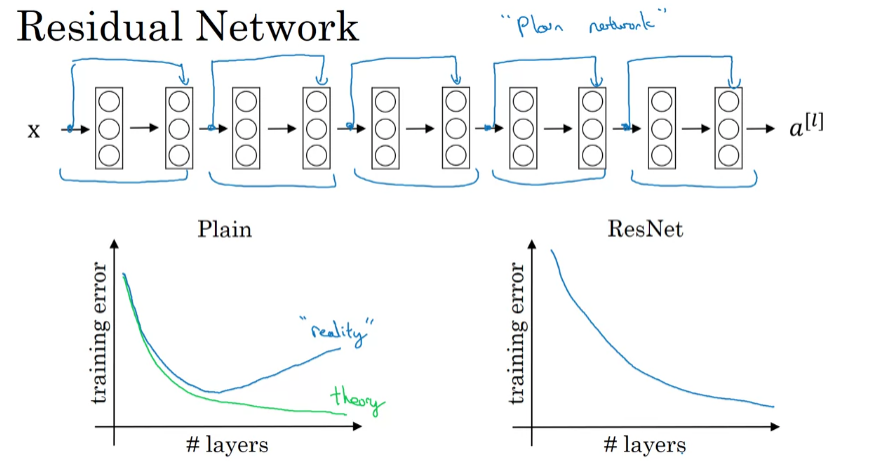

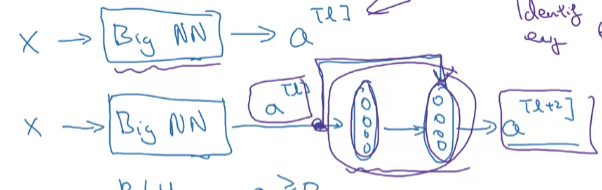

Why do resnets work so well:

Adding residual block after a big NN doesn't hurt the performance of neural network

In fact, if we expand the below equation
```
a[l+2] = g(z[l+2] + a[l])
```

```
a[l+2] = g(w[l+2]*a[l+1] + b[l+2] + a[l])
```

Now, if we have applied L2 regularization, let's saw, the parameters w[l+2] and b[l+2] become 0's, then a[l+2] is still = a[l]

Hence, the residual block learns the identity function and doesn't hurt the performance

Now, when building deep neural networks, if all hidden layers learn something useful, they can perform even better than learning the identity function.

What goes wrong without these residual networks is layers fail to choose even those parameters that learn the identity function. Which is why a lot of layers end up making the result worse.

Also, through the addition, we assume z[l+2] and a[l] have the same dimension.

Hence resnets use a lot of 'same' convolutions

Even if a[l] has a different dimension, we use a matrix (Ws) to alter the dimensions of a[l]. Now, the matrix can be just padding or hyperparameters to train and so on.

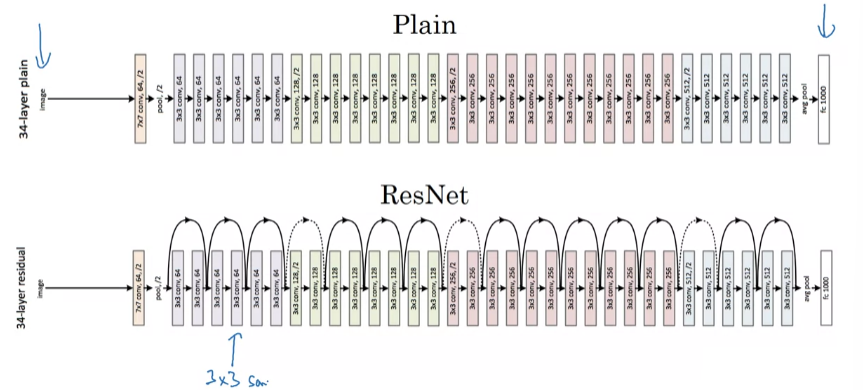

### 1 ✖ 1 convolutions

Also called network in network

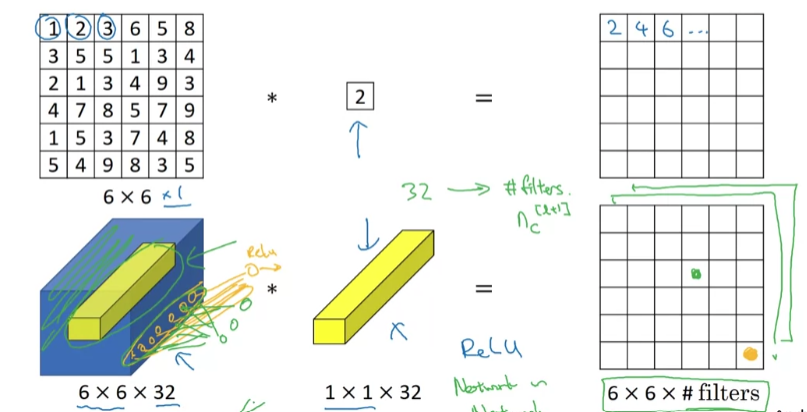

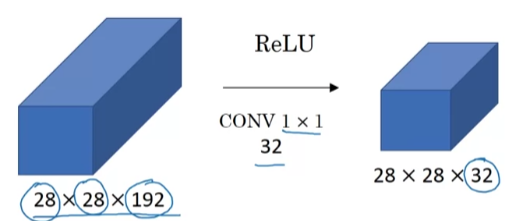

If we want to shrink height and width, we can use pooling layer, but what if the number of channels got too big

We can use 32 1 * 1 * 192 filters

### Inception Network

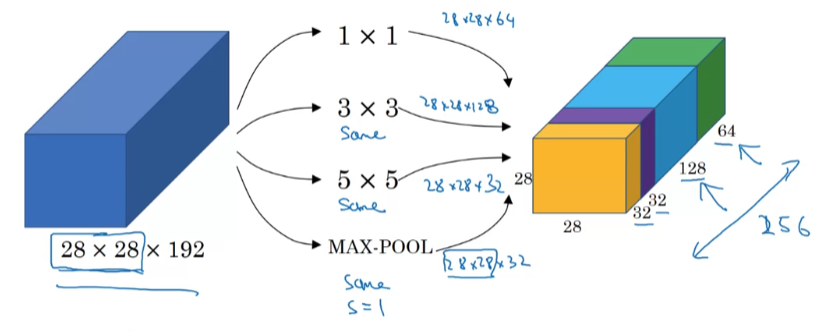

The basic idea is instead of you needing to pick one of the filter sizes or pooling we want and committing to that, we can do thhem all and just concatenate all the outputs and let the network learn whatever parameters it wants to use.

The problem is computational cost

This cost can be reduced by 1 ✖ 1 convolution

#### Actual Inception Network

We have seen all the basic building blocks of inception network

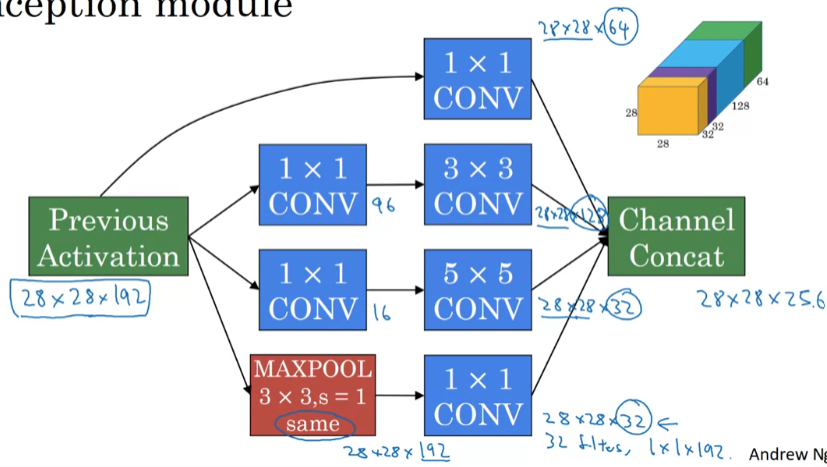

Inception network is the repeatition of these above inception modules

As this was developed by google, it is also called googleNet

### MobileNet

If we want our NN to work on device with less powerful CPU or GPU at deployment, there's another NN architecture called MobileNet

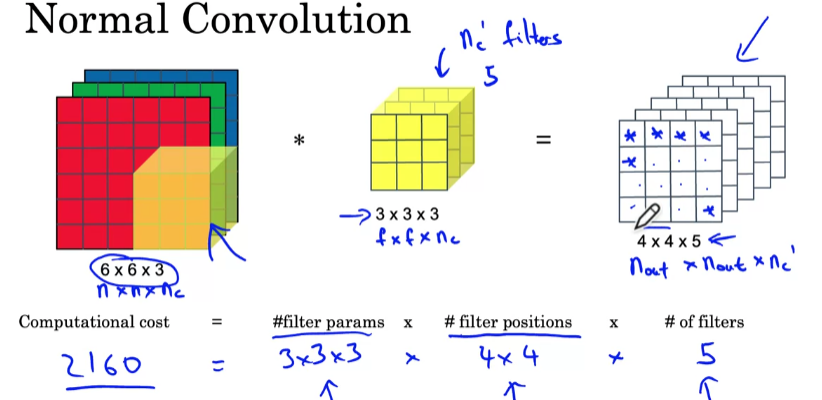

#### Depthwise Convolution

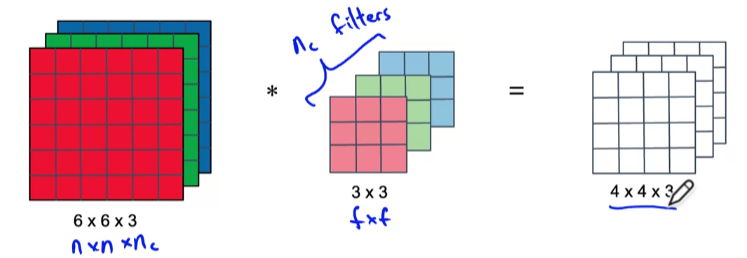

Here, the filters have dimensions as 3 ✖ 3 and no. of filters = nc

The way computation goes is each filter is for each output depth, we convolve each filter with each of the channels of input image

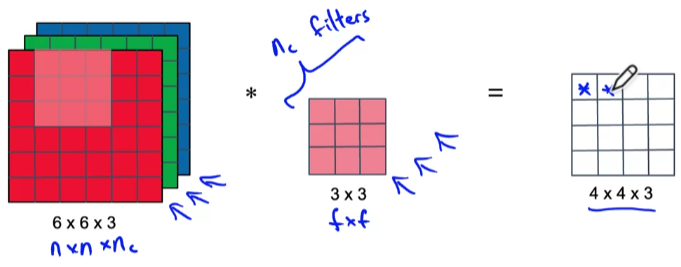

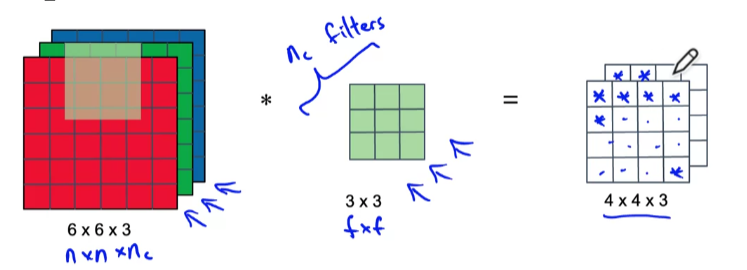

The size of the output is nout ✖ nout ✖ nc

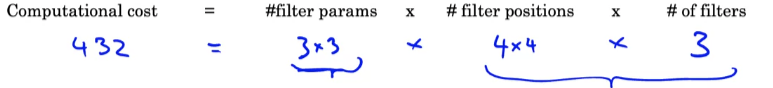

The remaining step is taking 4 ✖ 4 ✖ 3 values and apply pointwise convolution to get the output we want which is 4 ✖ 4 ✖ 5

#### Pointwise convolution

It is simply convoluting the 4 x 4 x 3 with 5 filters having dimension : 1 x 1 x 3  resulting in 4 x 4 x 5 final matrix

computational cost = 4 x 4 x 5 x 3 = 240

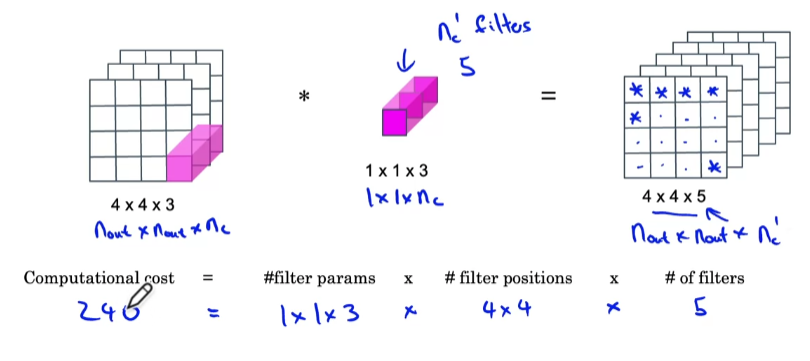

It is generally about 10 times cheaper in neural networks with higher channels

#### MobileNet Architecture

Everywhere we previously had an expensive convolutional operation, we can use a much less expensive depthwise seperable convolutional operation.

### EfficientNet

How can you automatically scale up or down neural networks for a particular device? EfficientNet, gives you a way to do so.

There are three parameters that define the neural network
* r -> resolution
* d -> depth
* w -> width

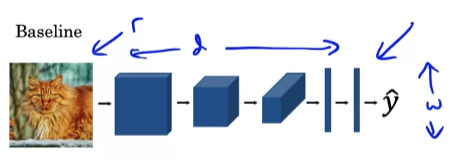

The question is, given a particular computational budget, what's the good choice of r, d, and w?

The solution is a trade off

### Transfer Learning

sometimes it's better to use models trained by others than to train our own as it is resourse efficient and less time consuming and sometimes performs better as they are trained on Gpus and Tpus

We freeze parameters of previous internal layers and customize last output layers

Some hyperparameters to do so can be:
```
trainableParameters = 0
freeze = 1
```
I think that computer vision is one where transfer learning is something that you should almost always do unless, you have an exceptionally large data set to train everything else from scratch yourself